<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

**Grupo 8**

**Integrantes:**


*   Abdala, Agustin
*   Acosta, Martín
*   Baulina, David
*   Giovine, Carina
----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv(
    'https://raw.githubusercontent.com/agustinabdala/diplodatos/main/raw_input_files/melb_data_extended.csv')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,S,3067.0,1.0,1.0,202.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,3,h,850000.0,PI,3067.0,2.0,1.0,94.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,4,h,1600000.0,VB,3067.0,1.0,2.0,120.0,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,2,h,941000.0,S,3067.0,1.0,0.0,181.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,3,h,1876000.0,S,3067.0,2.0,0.0,245.0,210.0,1910.0,3067.0,130.624031,258.0,605.152174,2187.032258


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
categorical_cols = ['Type']
numerical_cols = ['Rooms']

In [ ]:
melb_df[categorical_cols].nunique()

Type    3
dtype: int64

In [ ]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Type    0
dtype: int64

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

In [ ]:
#mice_year_built = melb_data_mice.YearBuilt.to_frame()
#mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
#melb_year_build = melb_df.YearBuilt.dropna().to_frame()
#melb_year_build['Imputation'] = 'Original'
#data = pandas.concat([mice_year_built, melb_year_build])
#fig = plt.figure(figsize=(8, 5))
#g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

KeyError: ignored

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


# Respuestas

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


## 1- Seleccion de todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas
import sklearn
import seaborn
seaborn.set_context('talk')
from operator import index
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
#se conserva nombre del df pero le URL es el del ejercicio solicitado.
melb_df = pandas.read_csv(
    'https://raw.githubusercontent.com/agustinabdala/diplodatos/main/raw_input_files/melb_data_extended.csv')
melb_df[:3]

,Suburb,Rooms,Type,Price,Method,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,S,3067.0,1.0,1.0,202.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,3,h,850000.0,PI,3067.0,2.0,1.0,94.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,4,h,1600000.0,VB,3067.0,1.0,2.0,120.0,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258


In [ ]:
melb_df.columns


Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Postcode', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'zipcode',
       'airbnb_price_mean', 'airbnb_record_count', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean'],
      dtype='object')



## 2- Aplicación de una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. 



Para la aplicacion del One-hot encoding seleccionaremos la siguiente variables categoricas:


*   Tipo de vivienda variable 'Method'



In [ ]:
categorical_cols = ['Method']


Se verifica la cantidad de categorias dentro de cada variable

In [ ]:
melb_df[categorical_cols].nunique()

Method    5
dtype: int64

In [ ]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Method    0
dtype: int64

Se verifican cantidades pór cada categoria

In [ ]:
"""
Method: S - property sold;
SP - property sold prior; 
PI - property passed in; 
PN - sold prior not disclosed; 
SN - sold not disclosed; 
NB - no bid; 
VB - vendor bid; 
W - withdrawn prior to auction; 
SA - sold after auction; 
SS - sold after auction price not disclosed. 
N/A - price or highest bid not available.
"""
melb_df.value_counts('Method')

Method
S     8429
SP    1618
PI    1461
VB    1097
SA      91
dtype: int64

Se aplica codificación y se presentan dos formas de anexarlas a una tabla



In [ ]:
#ONEHOTENCODER I
y = sklearn.preprocessing.LabelBinarizer().fit_transform(melb_df['Method'])
y

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
method_encoder = sklearn.preprocessing.LabelBinarizer()
method_encoder.fit(melb_df['Method'])
method_encoder.get_params
transformed = method_encoder.transform(melb_df['Method'])
ohe_df = pandas.DataFrame(transformed)
#se renombran las columnas con las clases detectadas por LabelBinarizer
nombre_cols = ["Method_" + i for i in method_encoder.classes_]
ohe_df.columns = nombre_cols
encoded_df = pandas.concat([melb_df, ohe_df], axis=1).drop(['Method'], axis=1)
pandas.set_option('display.max_columns', None)
encoded_df.head()


,Suburb,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,Abbotsford,2,h,1480000.0,3067.0,1.0,1.0,202.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,0,1,0,0,0
1,Abbotsford,3,h,850000.0,3067.0,2.0,1.0,94.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,1,0,0,0,0
2,Abbotsford,4,h,1600000.0,3067.0,1.0,2.0,120.0,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258,0,0,0,0,1
3,Abbotsford,2,h,941000.0,3067.0,1.0,0.0,181.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,0,1,0,0,0
4,Abbotsford,3,h,1876000.0,3067.0,2.0,0.0,245.0,210.0,1910.0,3067.0,130.624031,258.0,605.152174,2187.032258,0,1,0,0,0


In [ ]:
# ONEHOTENCODER PARA TODAS LAS CATEGORICAS
categorical_cols = ['Suburb', 'Type', 'Method']
df_ohe = pandas.get_dummies(melb_df, columns = categorical_cols)
df_ohe

,Rooms,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb

In [ ]:
# ONEHOTENCODER PARA TODAS LAS CATEGORICAS II

categorical_cols =['Suburb', 'Type', 'Method']
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False)
#labels = (onehotencoder.categories_).tolist()

transformed_data = onehotencoder.fit_transform(melb_df[categorical_cols])
# the above transformed_data is an array so convert it to dataframe
encoded_data = pandas.DataFrame(transformed_data, index=melb_df.index)
encoded_data.columns = onehotencoder.get_feature_names()

# now concatenate the original data and the encoded data using pandas
df_onehotencoding_corregido = pandas.concat([melb_df, encoded_data], axis=1)

df_onehotencoding_corregido.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Suburb,Rooms,Type,Price,Method,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_Abbotsford,x0_Aberfeldie,x0_Airport West,x0_Albanvale,x0_Albert Park,x0_Albion,x0_Alphington,x0_Altona,x0_Altona Meadows,x0_Altona North,x0_Ardeer,x0_Armadale,x0_Ascot Vale,x0_Ashburton,x0_Ashwood,x0_Aspendale,x0_Aspendale Gardens,x0_Attwood,x0_Avondale Heights,x0_Bacchus Marsh,x0_Balaclava,x0_Balwyn,x0_Balwyn North,x0_Bayswater,x0_Bayswater North,x0_Beaconsfield,x0_Beaconsfield Upper,x0_Beaumaris,x0_Bellfield,x0_Bentleigh,x0_Bentleigh East,x0_Berwick,x0_Black Rock,x0_Blackburn,x0_Blackburn North,x0_Blackburn South,x0_Bonbeach,x0_Boronia,x0_Box Hill,x0_Braybrook,x0_Briar Hill,x0_Brighton,x0_Brighton East,x0_Broadmeadows,x0_Brookfield,x0_Brooklyn,x0_Brunswick,x0_Brunswick East,x0_Brunswick West,x0_Bulleen,x0_Bullengarook,x0_Bundoora,x0_Burnley,x0_Burnside,x0_Burnside Heights,x0_Burwood,x0_Burwood East,x0_Cairnlea,x0_Camberwell,x0_Campbellfield,x0_Canterbury,x0_Carlton,x0_Carlton North,x0_Carnegie,x0_Caroline Springs,x0_Carrum,x0_Carrum Downs,x0_Caulfield,x0_Caulfield East,x0_Caulfield North,x0_Caulfield South,x0_Chadstone,x0_Chelsea,x0_Chelsea Heights,x0_Cheltenham,x0_Chirnside Park,x0_Clarinda,x0_Clayton,x0_Clayton South,x0_Clifton Hill,x0_Coburg,x0_Coburg North,x0_Collingwood,x0_Coolaroo,x0_Craigieburn,x0_Cranbourne,x0_Cranbourne North,x0_Cremorne,x0_Croydon,x0_Croydon Hills,x0_Croydon North,x0_Croydon South,x0_Dallas,x0_Dandenong,x0_Dandenong North,x0_Deepdene,x0_Deer Park,x0_Delahey,x0_Derrimut,x0_Diamond Creek,x0_Diggers Rest,x0_Dingley Village,x0_Docklands,x0_Doncaster,x0_Doncaster East,x0_Donvale,x0_Doreen,x0_Doveton,x0_Eaglemont,x0_East Melbourne,x0_Edithvale,x0_Elsternwick,x0_Eltham,x0_Eltham North,x0_Elwood,x0_Emerald,x0_Endeavour Hills,x0_Epping,x0_Essendon,x0_Essendon North,x0_Essendon West,x0_Fairfield,x0_Fawkner,x0_Ferntree Gully,x0_Fitzroy,x0_Fitzroy North,x0_Flemington,x0_Footscray,x0_Forest Hill,x0_Frankston,x0_Frankston North,x0_Frankston South,x0_Gardenvale,x0_Gisborne,x0_Gladstone Park,x0_Glen Huntly,x0_Glen Iris,x0_Glen Waverley,x0_Glenroy,x0_Gowanbrae,x0_Greensborough,x0_Greenvale,x0_Hadfield,x0_Hallam,x0_Hampton,x0_Hampton East,x0_Hampton Park,x0_Hawthorn,x0_Hawthorn East,x0_Healesville,x0_Heathmont,x0_Heidelberg,x0_Heidelberg Heights,x0_Heidelberg West,x0_Highett,x0_Hillside,x0_Hoppers Crossing,x0_Hughesdale,x0_Huntingdale,x0_Hurstbridge,x0_Ivanhoe,x0_Ivanhoe East,x0_Jacana,x0_Kealba,x0_Keilor,x0_Keilor Downs,x0_Keilor East,x0_Keilor Lodge,x0_Keilor Park,x0_Kensington,x0_Kew,x0_Kew East,x0_Keysborough,x0_Kilsyth,x0_Kings Park,x0_Kingsbury,x0_Kingsville,x0_Knoxfield,x0_Kooyong,x0_Kurunjang,x0_Lalor,x0_Langwarrin,x0_Lower Plenty,x0_Maidstone,x0_Malvern,x0_Malvern East,x0_Maribyrnong,x0_McKinnon,x0_Meadow Heights,x0_Melbourne,x0_Melton,x0_Melton South,x0_Melton West,x0_Mentone,x0_Mernda,x0_Middle Park,x0_Mill Park,x0_Mitcham,x0_Monbulk,x0_Mont Albert,x0_Montmorency,x0_Montrose,x0_Moonee Ponds,x0_Moorabbin,x0_Mooroolbark,x0_Mordialloc,x0_Mount Evelyn,x0_Mount Waverley,x0_Mulgrave,x0_Murrumbeena,x0_Narre Warren,x0_Newport,x0_Niddrie,x0_Noble Park,x0_North Melbourne,x0_North Warrandyte,x0_Northcote,x0_Notting Hill,x0_Nunawading,x0_Oak Park,x0_Oakleigh,x0_Oakleigh East,x0_Oakleigh South,x0_Officer,x0_Ormond,x0_Pakenham,x0_Parkdale,x0_Parkville,x0_Pascoe Vale,x0_Plumpton,x0_Point Cook,x0_Port Melbourne,x0_Prahran,x0_Preston,x0_Princes Hill,x0_Reservoir,x0_Richmond,x0_Riddells Creek,x0_Ringwood,x0_Ringwood East,x0_Ringwood North,x0_Ripponlea,x0_Rockbank,x0_Rosanna,x0_Rowville,x0_Roxburgh Park,x0_Sandhurst,x0_Sandringham,x0_Scoresby,x0_Seabrook,x0_Seaford,x0_Seaholme,x0_Seddon,x0_Skye,x0_South Kingsville,x0_South Melbourne,x0_South Morang,x0_South Yarra,x0_Southbank,x0_Spotswood,x0_Springvale,x0_Springvale South,x0_St Albans,x0_St Helena,x0_St Kilda,x0_Strathmore,x0_Strathmore Heights,x0_Sunbury,x0_Sunshine,x0_Sunshine North,x0_Sun

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = melb_df.copy()
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[['Abbotsford' 2 'h' ... 258.0 605.1521739130435 2187.032258064516]
 ['Abbotsford' 3 'h' ... 258.0 605.1521739130435 2187.032258064516]
 ['Abbotsford' 4 'h' ... 258.0 605.1521739130435 2187.032258064516]
 ...
 ['Williamstown' 3 'h' ... 74.0 612.25 2119.75]
 ['Williamstown' 4 'h' ... 74.0 612.25 2119.75]
 ['Yarraville' 4 'h' ... 82.0 923.5714285714286 2966.090909090909]]


ValueError: ignored

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

## 1- Agregar a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.

Se presenta tabla con todas las columnas y el encoding de la variable categorica 'Type'

In [ ]:
encoded_df.head()

,Suburb,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,Abbotsford,2,h,1480000.0,3067.0,1.0,1.0,202.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,0,1,0,0,0
1,Abbotsford,3,h,850000.0,3067.0,2.0,1.0,94.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,1,0,0,0,0
2,Abbotsford,4,h,1600000.0,3067.0,1.0,2.0,120.0,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258,0,0,0,0,1
3,Abbotsford,2,h,941000.0,3067.0,1.0,0.0,181.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,0,1,0,0,0
4,Abbotsford,3,h,1876000.0,3067.0,2.0,0.0,245.0,210.0,1910.0,3067.0,130.624031,258.0,605.152174,2187.032258,0,1,0,0,0


## 2- Aplicacición de una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables.

KNN Imputer precisa que los datos esten estandarizados. Datos con diferentes escalas introducen valores de reemplazo sesgados.

In [ ]:
melb_data_mice = df_ohe.copy(deep=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
min_max.fit(melb_data_mice)

normalized_array = min_max.transform(melb_data_mice)

normalized_df = pandas.DataFrame(normalized_array, columns=melb_data_mice.columns)

normalized_df.head()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb

Aplicamos KNN desde el código visto en Clase 2 Datos Faltantes

In [ ]:
from sklearn.impute import KNNImputer
melb_data_knn = normalized_df.copy(deep=True)
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
melb_data_knn[['YearBuilt','BuildingArea']] = knn_imputer.fit_transform(melb_data_knn[['YearBuilt','BuildingArea']])
melb_data_knn.head()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb

## 3- Realización de un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

Grafico de distribución para 'YearBuilt' antes y despues de imputación

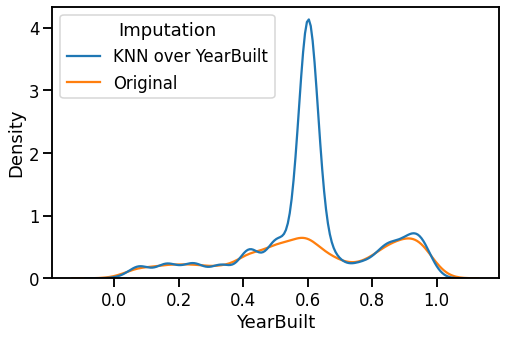

In [ ]:
#YearBuilt
mice_year_built = melb_data_knn.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_build = normalized_df.YearBuilt.to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True)
#melb_year_build.head()
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

Grafico de distribución para 'BuildingArea' antes y despues de imputación




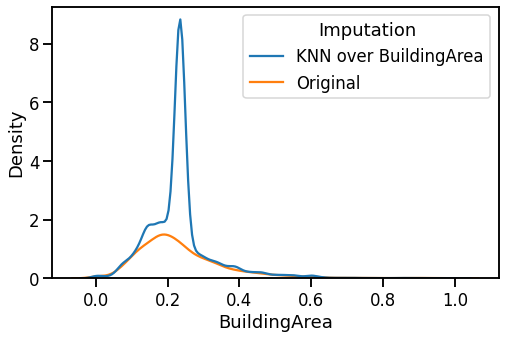

In [ ]:
#BuildingArea
mice_year_built = melb_data_knn.BuildingArea.to_frame()
mice_year_built['Imputation'] = 'KNN over BuildingArea'
melb_year_build = normalized_df.BuildingArea.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data2 = pandas.concat([mice_year_built, melb_year_build], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data2, x='BuildingArea', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## 1- Aplicación de `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?

Para la aplicacion de PCA sera necesario estandarizar o escalar los datos para asegurar de que todas las variables estén en las mismas unidades y ninguna tenga un peso demasiado grande.

In [ ]:
melb_data_knn.head()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb

In [ ]:
#Aplicacion PCA a partir de template realizado en clases.  N

from sklearn.preprocessing import StandardScaler
features = ['BuildingArea', 'Price', 'YearBuilt', 'Price']

# Separating out the features
x = melb_data_knn.loc[:, features].values

# Separating out the target
type_cols = melb_data_knn.columns[melb_data_knn.columns.str.contains('Type_*')]

y = melb_data_knn.loc[:, type_cols].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

type_cols_standard = StandardScaler().fit_transform(y)

In [ ]:
from sklearn.decomposition import PCA
#segun la consigna, n: (decia 20, pero no tendriamos esa cantidad de columnas/datos en el df)
n = min(2, x.shape[0])

pca = PCA(n)

principalComponents = pca.fit_transform(x)
principalDf = pandas.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pandas.concat([principalDf, melb_df[['Type']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Type
0,1.075903,-0.023545,h
1,-0.393948,0.016668,h
2,0.996256,1.585458,h
3,-0.181636,0.010859,h
4,3.037849,-1.763551,h


## 2- Grafico de la varianza capturada por los primeros $n$ componentes principales, para cada $n$.

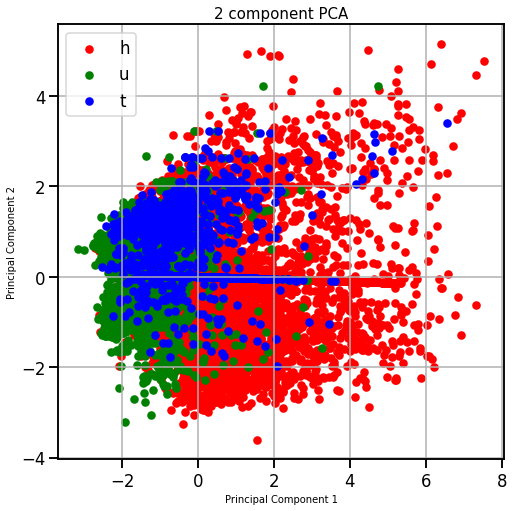

In [ ]:
#visualizamos la proyeccion:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 15)
targets = ['h', 'u', 't']    # Type: h, u, t
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
"""
first principal component contains A % of the variance and
 the second principal component contains B % of the variance.

Together, the two components contain CC% of the information.
"""
A = pca.explained_variance_ratio_[0]
B = pca.explained_variance_ratio_[1]
C = A+B

print("{}\n{}\n{}".format(A, B, C))

0.5856228370711224
0.2569161309148255
0.8425389679859479


## 3- En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Agregamos los valores del PCA al dataset

In [ ]:
# Haremosjoin de los df melb_data_knn y los PCA (principalDf) de los ejercicios anteriores:
merged_df = pandas.concat([melb_data_knn, principalDf], axis = 1)
merged_df.head()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb

## Ejercicio 4: Composición del resultado

Transformación del conjunto de datos procesado en un `pandas.DataFrame` y guardado en un archivo.


Se realizara una union del dataset obtenido luego de realizar transformación One-hot encoding e imputación KNN con el dataset obtenido luego de aplicación PCA.
Dentro de los ejercicios de OneHotEncoder se han aplicado los nombres respectivos de cada columna.

In [ ]:
# Haremosjoin de los df melb_data_knn y los PCA (principalDf) de los ejercicios anteriores:
merged_df = pandas.concat([melb_data_knn, principalDf], axis = 1)
merged_df.head()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Lower Plenty,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_Montmorency,Suburb_Montrose,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Evelyn,Suburb_Mount Waverley,Suburb_Mulgrave,Suburb_Murrumbeena,Suburb_Narre Warren,Suburb

Creación y guardado del nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
merged_df.to_csv("melb_data_transformed.csv", index=None)

In [ ]:
from google.colab import files
files.download('melb_data_transformed.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
